<a href="https://colab.research.google.com/github/Shakthi25-dev/ServoMotor_Prediction_Using_LinearRegresiion/blob/main/NaviIntern.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text here](https://d1pnnwteuly8z3.cloudfront.net/images/4d5bf260-c3d0-4f21-b718-8ede8d4ca716/febf9de6-8a5a-4055-b274-e685485496f5.jpeg)



#**Project Over-View**

This project aims to Scrape the Multiple Web Pages and analyze book data from books.toscrape.com to build a predictive model for book prices based on their ratings and Visualized it.





## ***Import Library***



*   Utilized the **requests** library to send HTTP requests to books.toscrape.com and retrieve website data.

*   Employed **BeautifulSoup** to parse the HTML content and extract relevant information, such as book titles, ratings, and prices.
* Created a **Pandas** DataFrame to organize the scraped data.   


* Generated visualizations using **seaborn** to gain insights into price distributions and the relationship between ratings and prices.  



In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns

## ***Making HTTP requests and scraping multiple pages***

In [ ]:
Books = []
for i  in range(1,51): # Using Loop to Handling Multiple Pages
  url = f'https://books.toscrape.com/catalogue/page-{i}.html'
  headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36", "Accept-Language": "en-GB,en-US;q=0.9,en;q=0.8", "Referer": "https://books.toscrape.com/catalogue/page-2.html"}
  response= requests.get(url, headers)
  soup = BeautifulSoup(response.content, 'html.parser')
  articles = soup.find_all('article', class_='product_pod')

  for article in articles: # This Loop for scrape the Data
    title = article.find('h3').a.text.strip('...')
    rating = article.find('p')['class'][1]
    price = float(article.find('p', class_='price_color').text[1:])
    Books.append([title, rating, price])

## ***Data Analysis***

In [ ]:
df = pd.DataFrame(Books, columns=['Title', 'Rating', 'Price'],index=range(1,len(Books)+1)) # Create DataFrame

In [ ]:
df.to_csv('books.csv', index=False) # Save DataFrame to CSV file

In [ ]:
First_five = df.head() # It Shows First Five Data
First_five

,Title,Rating,Price
1,A Light in the,Three,51.77
2,Tipping the Velvet,One,53.74
3,Soumission,One,50.10
4,Sharp Objects,Four,47.82
5,Sapiens: A Brief History,Five,54.23


In [ ]:
df.info() # Data Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 1 to 1000
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Title   1000 non-null   object 
 1   Rating  1000 non-null   object 
 2   Price   1000 non-null   float64
dtypes: float64(1), object(2)
memory usage: 23.6+ KB


In [ ]:
df.describe() # Data Description

,Price
count,1000.00000
mean,35.07035
std,14.44669
min,10.00000
25%,22.10750
50%,35.98000
75%,47.45750
max,59.99000


## ***Data Visualization***


*   displot
*   barplot



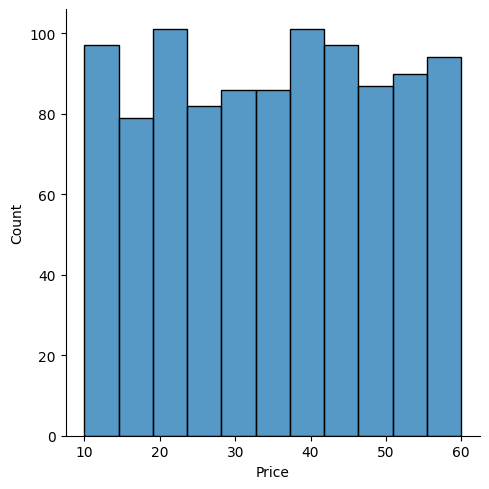

In [ ]:
sns.displot(df['Price']) # Histogram Visualization

<ipython-input-11-ec11ed39ba4b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Rating', y='Price', data=df, palette='rocket')


<Axes: xlabel='Rating', ylabel='Price'>

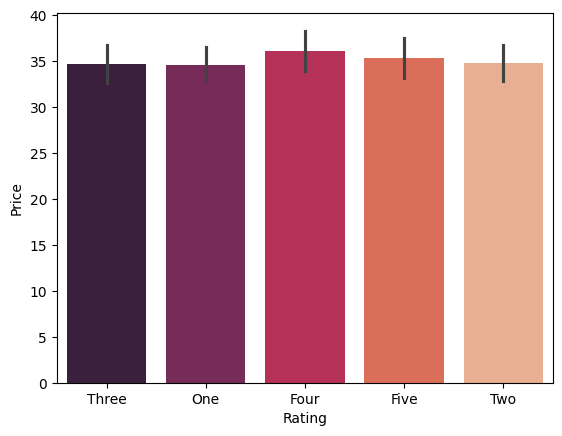

In [ ]:
sns.barplot(x='Rating', y='Price', data=df, palette='rocket') # Barplot Visualization

##***Data Preprocessing***


*   **Data Cleaning:** Cleaned the scraped data to handle missing values, inconsistencies, and irrelevant information.

*   **Data Transformation:** Converted string-based ratings (e.g., "One", "Two") to numerical representations (e.g., 1, 2) using the replace function in Pandas.



In [ ]:
df.replace({'Rating':{'One':1, 'Two':2, 'Three':3, 'Four':4,'Five':5}},inplace = True) # Convert String to Number
df.head()

,Title,Rating,Price
1,A Light in the,3,51.77
2,Tipping the Velvet,1,53.74
3,Soumission,1,50.10
4,Sharp Objects,4,47.82
5,Sapiens: A Brief History,5,54.23


##***Feature, Target Selection and Data Splitting***


1.   **Feature:** Selected "Rating" as the predictor variable (x).

2.   **Target:** Selected "Price" as the target variable (y).

3.   Divided the dataset into training and testing sets using **train_test_split from scikit-learn**
      



In [ ]:
from sklearn.linear_model import LinearRegression # Import Model
from sklearn.model_selection import train_test_split # Import Split

In [ ]:
x = df['Rating']
y = df['Price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # Split Data to Train and Test

## ***Model Training***
Created a linear regression model using **LinearRegression from scikit-lea**rn.
Trained the model on the training data **(x_train, y_train)** using the **fit** method.

In [ ]:
lr = LinearRegression() # Create Model
lr.fit(x_train.values.reshape(-1, 1), y_train)

LinearRegression()

##***Data Reshaping and Prediction***

1.  Transformed the training data **(x_train)** into a 2D array **(using reshape(-1, 1))** to meet the input requirements of the linear regression model in scikit-learn.

2.  Predicted prices **(y_pred)** on the test data **(x_test)** using the trained model and the predict method.




In [ ]:
y_pred = lr.predict(x_test.values.reshape(-1, 1)) # Predict Data
y_pred

array([36.03478658, 34.59455066, 35.31466862, 36.03478658, 35.31466862,
       34.59455066, 34.59455066, 34.95460964, 34.95460964, 34.59455066,
       34.95460964, 35.31466862, 36.03478658, 36.03478658, 35.31466862,
       34.59455066, 34.59455066, 36.03478658, 34.59455066, 35.31466862,
       35.6747276 , 36.03478658, 34.59455066, 36.03478658, 35.6747276 ,
       35.6747276 , 34.95460964, 35.6747276 , 35.6747276 , 34.59455066,
       34.95460964, 35.6747276 , 36.03478658, 35.6747276 , 35.6747276 ,
       35.31466862, 35.31466862, 35.6747276 , 35.6747276 , 35.31466862,
       35.31466862, 34.59455066, 34.95460964, 35.6747276 , 35.31466862,
       36.03478658, 35.6747276 , 36.03478658, 34.59455066, 36.03478658,
       34.95460964, 34.59455066, 36.03478658, 35.31466862, 36.03478658,
       36.03478658, 35.31466862, 34.95460964, 34.95460964, 34.59455066,
       35.6747276 , 36.03478658, 34.95460964, 34.95460964, 35.31466862,
       34.59455066, 36.03478658, 35.31466862, 35.31466862, 36.03




##***Model Evolution***
Visualization of predicted vs. actual values would also be beneficial.


*   Mean Squared Error (MSE)
*   Mean Absolute Error (MAE)
*   R-squared





In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # Import Metrics

In [ ]:
mean_squared_error(y_test, y_pred)

211.4538481028864

In [ ]:
mean_absolute_error(y_test, y_pred)

12.657940058577998

In [ ]:
r2_score(y_test, y_pred)

-0.006618384017733847

#**Conclusion**
This project successfully scraped book data from books.toscrape.com, analyzed the relationship between book ratings and prices, and built a predictive model using linear regression. The model's performance was evaluated using metrics such as Mean Squared Error (MSE), Mean Absolute Error (MAE), and R-squared. The insights gained from this project can be valuable for understanding pricing trends in the book market and making informed decisions. Further improvements could involve exploring different regression models or incorporating additional features for enhanced prediction accuracy.